In [53]:
import scipy.integrate
import numpy
import matplotlib.pyplot
import os
import json
import scipy.interpolate
#for partial specialization
import cModel
import importlib
importlib.reload(cModel)
import time
import ivp
importlib.reload(ivp)
import runSolver
importlib.reload(runSolver)

#run solver
fh=os.path.expanduser('~')
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
runSolver.main([setupFile,modelFile,parameterFile],os.path.join(os.path.expanduser('~'),'temp'))
#setup=runSolver.parseSetup(setupFile)
#t0,y0,S1,lut,lutSE=runSolver.getStartPoint(setup)


Calculating for bodyWeight/0:(925, 16) [300.42769002826583]
Calculating for brainBloodPC/33:(925, 16) [0.08617769624105241]
Calculating for brainPC/12:(925, 16) [0.7755992661694717]
Calculating for fatPC/29:(925, 16) [0.001938998165423679]
Calculating for gutPC/37:(925, 16) [0.3987761199573678]
Calculating for hairPCBlood/10:(925, 16) [24664.976951005923]
Calculating for kidneyPC/23:(925, 16) [1.3788431398568386]
Calculating for liverPC/36:(925, 16) [2.1544424060263103]
Calculating for rbcPC/4:(925, 16) [12.409588258711548]
Calculating for richlyPerfusedPC/28:(925, 16) [0.08617769624105241]
Calculating for slowlyPerfusedPC/8:(925, 16) [0.34471078496420965]
Calculating for cardiacOutputScaled/24:(925, 16) [0.005367027600000001]
Calculating for kidneyFlowFraction/25:(925, 16) [0.00275625]
Calculating for richlyPerfusedFlowFraction/26:(925, 16) [0.0030140099999999997]
Calculating for fatFlowFraction/30:(925, 16) [0.00024335999999999995]
Calculating for slowlyPerfusedFlowFraction/32:(925, 

In [50]:
jobDir=os.path.join(fh,'temp','current')
model=cModel.model()
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
model.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
scale=runSolver.getScale(setup)
tmax=setup['tmax']*scale
tOld,solOld,seOld,s1Old,qtOld=runSolver.loadSolutionFromRef(setup)
t0,y0,S1,lut,lutSE=runSolver.getStartPoint(setup)
#t0=tOld[-1]
#y0=solOld[-1]
#S1=s1Old[-1]
t,sol,se,s1=ivp.solveSimultaneous(model,tmax,atol=setup['atol'],\
         rtol=setup['rtol'],method=setup['method'],t0=t0,y0=y0,Sin=S1)
qt,sOut=runSolver.interpolate(setup,model,t,s1,t0,tmax)



Calculating for bodyWeight/0:(925, 16) [300.42769002826583]
Calculating for brainBloodPC/33:(925, 16) [0.08617769624105241]
Calculating for brainPC/12:(925, 16) [0.7755992661694717]
Calculating for fatPC/29:(925, 16) [0.001938998165423679]
Calculating for gutPC/37:(925, 16) [0.3987761199573678]
Calculating for hairPCBlood/10:(925, 16) [24664.976951005923]
Calculating for kidneyPC/23:(925, 16) [1.3788431398568386]
Calculating for liverPC/36:(925, 16) [2.1544424060263103]
Calculating for rbcPC/4:(925, 16) [12.409588258711548]
Calculating for richlyPerfusedPC/28:(925, 16) [0.08617769624105241]
Calculating for slowlyPerfusedPC/8:(925, 16) [0.34471078496420965]
Calculating for cardiacOutputScaled/24:(925, 16) [0.005367027600000001]
Calculating for kidneyFlowFraction/25:(925, 16) [0.00275625]
Calculating for richlyPerfusedFlowFraction/26:(925, 16) [0.0030140099999999997]
Calculating for fatFlowFraction/30:(925, 16) [0.00024335999999999995]
Calculating for slowlyPerfusedFlowFraction/32:(925, 

***********done************
(16, 16)
22
Time: 0.714 s
[ 0.          0.          0.          0.          0.          0.
  0.          0.12434798 -0.00099998  0.          0.          0.
  0.          0.          0.          0.        ]


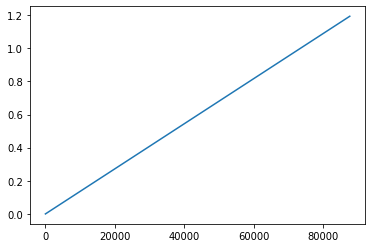

In [58]:
model=cModel.model()
fh=os.path.expanduser('~')
#sys.parse(os.path.join(fh,'software','src','Integra','models','cDiazepam.json'))
setupFile=os.path.join(fh,'software','src','PBPK','setup','setupFast.json')
modelFile=os.path.join(fh,'software','src','PBPK','models','humanHG.json')
parameterFile=os.path.join(fh,'software','src','PBPK','models','humanHG_parameters1.json')
sys.parse(modelFile,parameterFile)
setup=runSolver.parseSetup(setupFile)
tscale=runSolver.getScale(setup)

#sys.inspect()    

print("***********done************")
print(model.M(1).shape)
#print(sys.fSS(2))
print(model.m)

nt=setup['nt']
qtmax=24*60*365*10
qt=numpy.linspace(0,qtmax,nt)
#ft=[fw['derivatives']['fetusGrowthDuration'](x) for x in qt]
try:
    fw=model.get('fetusWeight')
    ft=[fw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ft)
except (KeyError,TypeError):
    pass

try:
    hw=model.get('hairVolume')
    ht=[10*hw['value'](x) for x in qt]
    matplotlib.pyplot.plot(qt/tscale,ht)
except (KeyError,TypeError):
    pass
start_time=time.time()
for i in range(100000):
    model.M(1e7)
end_time=time.time()
print('Time: {:.3f} s'.format(end_time-start_time))
print(sys.M(1000)[8,:])

In [55]:
tfile=os.path.join(os.path.expanduser('~'),'temp','sOut.txt')
sOut,lut,lutSE=runSolver.read3D(tfile)

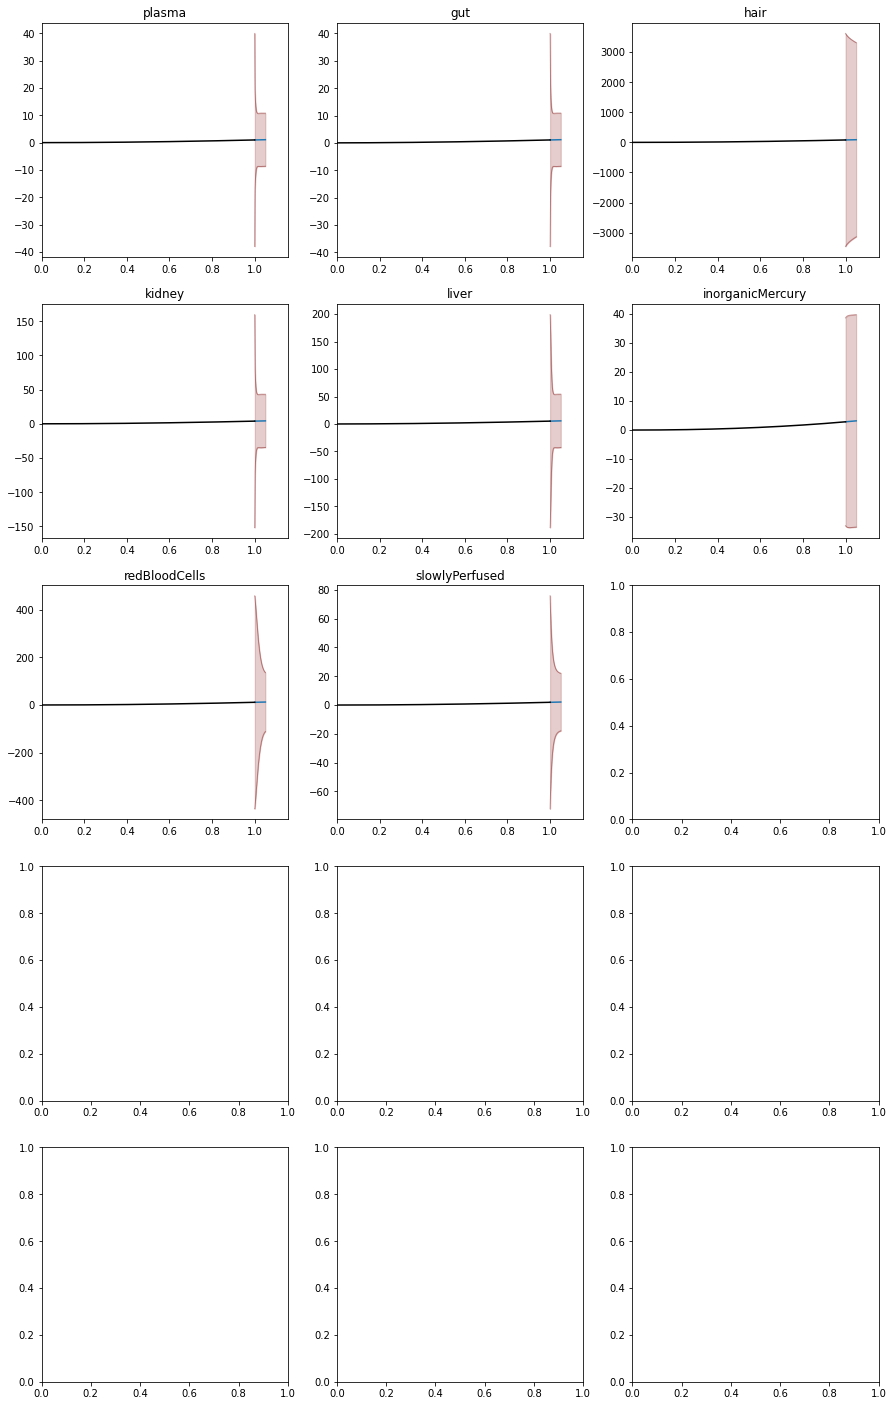

In [17]:
# #copy output of Thompson et al1
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fy=sol[:,model.lut[name[i]]]
    fe=se[:,model.lut[name[i]]]
    fy1=solOld[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fy)
    ax.plot(tOld/tscale,fy1,color='black')
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='red',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='red',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='red',linewidth=1,alpha=0.2)
    ax.fill_between(t/tscale, fy-fe, fy + fe, color='black',alpha=0.1)
    ax.plot(t/tscale,fy-fe,color='black',linewidth=1,alpha=0.2)
    ax.plot(t/tscale,fy+fe,color='black',linewidth=1,alpha=0.2)
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


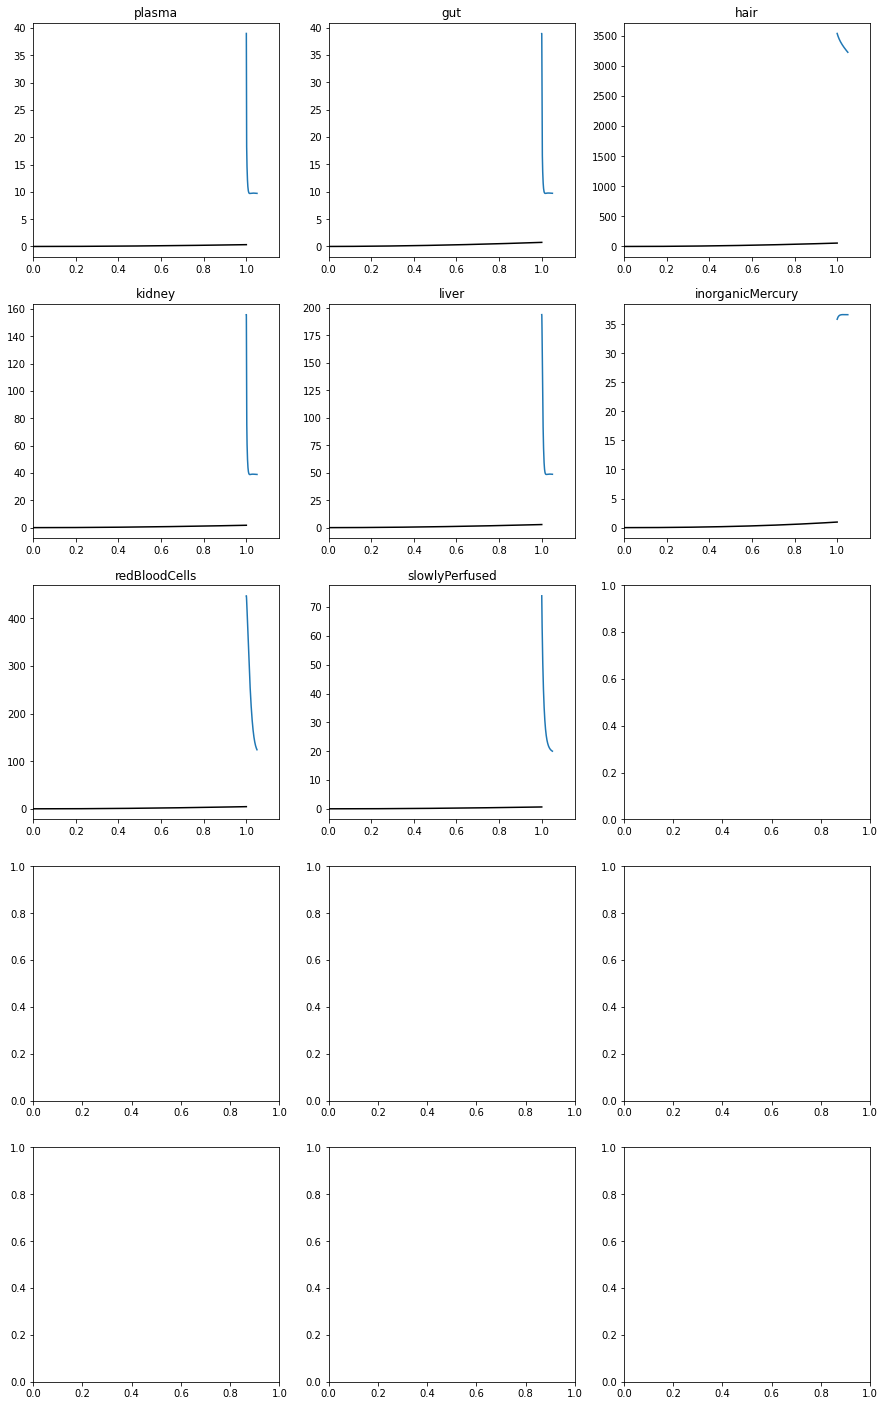

In [18]:
# #copy output of Thompson et al1
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=se[:,model.lut[name[i]]]
    fe1=seOld[:,model.lut[name[i]]]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(tOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


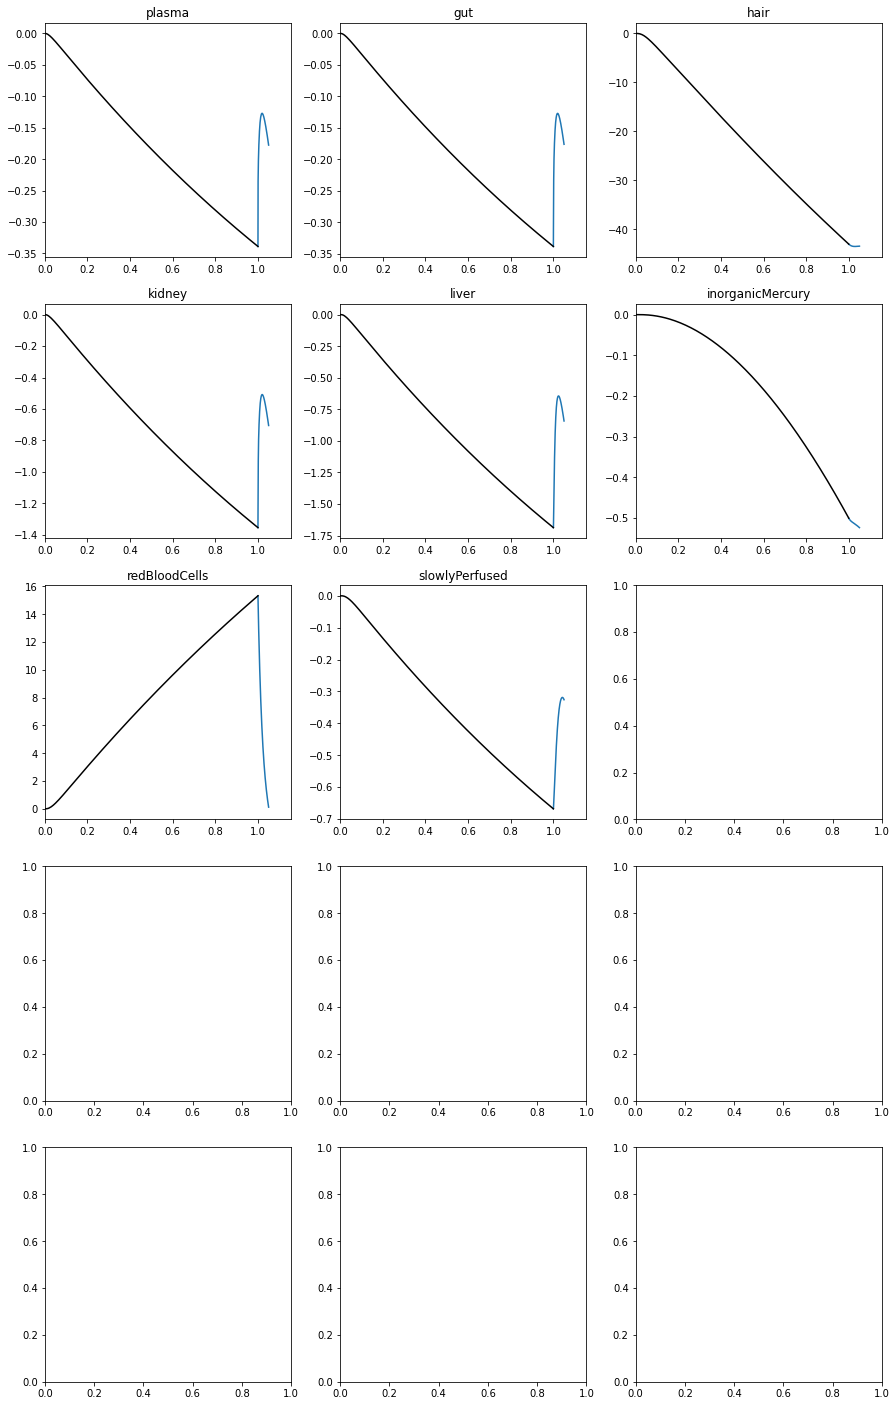

In [22]:
# #copy output of Thompson et al1
fig, axs = matplotlib.pyplot.subplots(5, 3,figsize=(15,25))
name=['arterial','adipose','brain','heart','kidney','liver','lung','muscle','skin',
      'splanchnic','stomach','testes','excrement']
name=['plasma','gut','hair','kidney','liver','inorganicMercury','redBloodCells','slowlyPerfused']

#diazepam
max=[1.5,2.6,3,4,5,2.5,6.8,1.5,1.5,4,4.2,3,25]
#cotinine
max=[9]*13
max[12]=90
max[2]=2

tscale=scale
ipar=2
max=[1000*x for x in max]
for i in range(len(name)):
    row=i//3
    col=i%3
    fe=s1[:,model.lut[name[i]],ipar]
    fe1=s1Old[:,model.lut[name[i]],ipar]
    ax=axs[row,col]
    ax.plot(t/tscale,fe)
    ax.plot(qtOld/tscale,fe1,color='black')
    axs[row,col].set_title(name[i])
    #axs[row,col].set_ylim([0,max[i]])
    axs[row,col].set_xlim([0,1.1*tmax/tscale])


7


7440

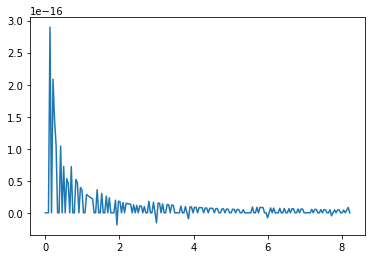

In [25]:
#gD=sys.get("hairGrowthDuration")
#print(gD['value']/60/24/365)
print(model.lut['slowlyPerfused'])
ft=[sys.fSS(x)[0,8,7] for x in qt]
#matplotlib.pyplot.imshow(sys.fSS(3e6)[0])
matplotlib.pyplot.plot(qt/tscale,ft)
30*248